In [1]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

## Figure 1, A5

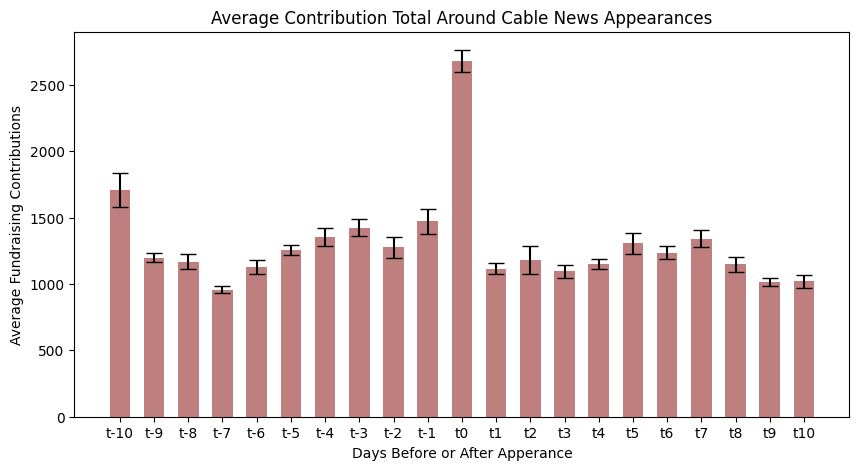

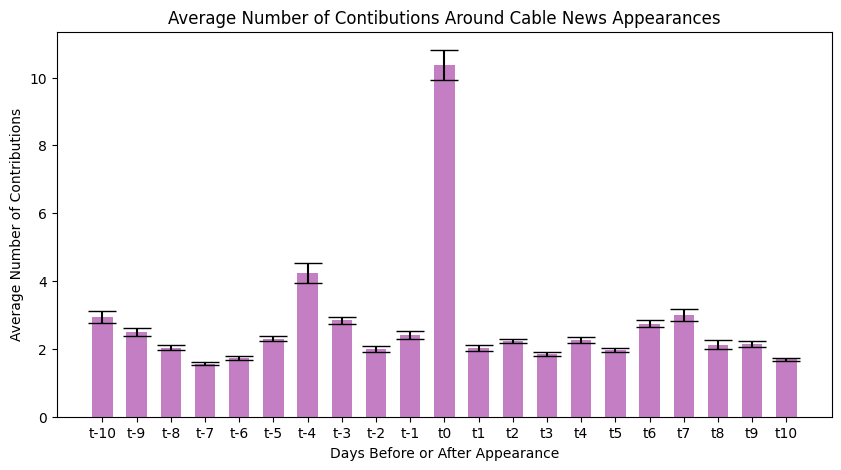

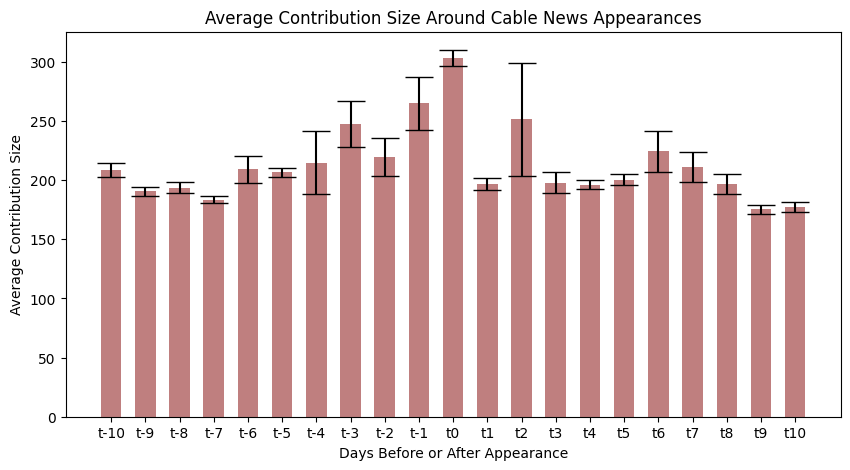

In [3]:
types = {'index' : 'int32', 'contribution_receipt_amount' : 'int32', 'inState_contributionAmount' : 'int32',
         'outState_contributionAmount' : 'int32', 'year' : 'int16', 'nextup' : 'int16',
         'type' : 'category', 'party_x' : 'category','party_y' : 'category',
         'inc' : 'int8', 'candidatevotes' : 'int64', 'totalvotes' : 'int64', 'won' : 'int8',
         'cnn' : 'int8', 'fox' : 'int8', 'msnbc' : 'int8', 'appearance_count1' : 'int8',
         'appearance_count' : 'int8', 'primetime1' : 'int8', 'primetime' : 'int8', 'tucker' : 'int8',
         'search_results' : 'int8', 'Approving' : 'int8', 'Disapproving' : 'int8', 'president' : 'category'}
df = pd.read_csv('house_appearances_fundraising.csv')
df = df.reset_index()
#print(df.columns)

#df = df.astype(types)
df[['year1', 'month', 'day']] = df['date'].str.split('-', expand=True)
df['cand_cycle'] = df['CAND_NAME'] + df['year'].astype(str)
#print(df['cand_cycle'])
df['cand_year'] = df['CAND_NAME'] + str(df['year1'])
df['net_approval'] = df['Approving'] - df['Disapproving']


#app_df = df[['party_x','party_y','net_approval']]
#app_df.loc[app_df['party_x'] == 'R', app_df['party_x']] = -1
#print(df['net_approval'][0:50])
df['search_results-1'] = df['search_results'].shift(periods=1)

#making indicators for contribution receipt amount before and after each day
for i in range(-10,11):
    df['t' + str(i)] = df['contribution_receipt_amount']
    df['t' + str(i)] = df['t' + str(i)].shift(i * -1)
#df['last3_search']

#making indicators for amount of contributions before and after each day
df['cont_num'] = df['cont_num'].fillna(0)
for i in range(-10,11):
    df['ct' + str(i)] = df['cont_num']
    df['ct' + str(i)] = df['ct' + str(i)].shift(i * -1)

#making indicators for average contribution size before and after each day
df['avg_cont'] = df['contribution_receipt_amount'] / df['cont_num']
df['avg_cont'] = df['avg_cont'].fillna(0)
for i in range(-10,11):
    df['at' + str(i)] = df['avg_cont']
    df['at' + str(i)] = df['at' + str(i)].shift(i * -1)

#making indicators for search results before and after each day
for i in range(-10,11):
    df['st' + str(i)] = df['search_results']
    df['st' + str(i)] = df['st' + str(i)].shift(i * -1)
#df['last3_search']

df = df.dropna(subset=['t-10', 't10'])

#model = smf.mixedlm(
#    formula = ' contribution_receipt_amount ~ appearance_count + primetime + tucker + search_results',
#                    data = df, groups=df[['date','cand_cycle']])
#results = model.fit()
#print(results.summary())

#storing values
t_values = [[],[],[],[],[],[],[],[],[]]
appearance_df = df.loc[df['appearance_count'] == 1]
for i in range(-10,11):
    col = 't' + str(i)
    t_values[0].append(col)
    t_values[1].append(appearance_df[col].mean())
    t_values[3].append(appearance_df[col].sem())
    t_values[2].append(appearance_df['s' + col].mean())
    t_values[4].append(appearance_df['s' + col].sem())
    t_values[5].append(appearance_df['c' + col].mean())
    t_values[6].append(appearance_df['c' + col].sem())
    t_values[7].append(appearance_df['a' + col].mean())
    t_values[8].append(appearance_df['a' + col].sem())

fig = plt.figure(figsize=(10, 5))

# creating the bar plot

plt.bar(t_values[0], t_values[1], color='maroon',
        width=0.6,yerr=t_values[3], align='center', alpha=0.5, ecolor='black', capsize=6)
plt.ylabel("Average Fundraising Contributions")
plt.xlabel("Days Before or After Apperance")
plt.title("Average Contribution Total Around Cable News Appearances")
plt.show()


#Doing the same for number of donations

fig = plt.figure(figsize=(10, 5))
plt.bar(t_values[0], t_values[5], color='darkmagenta',
        width=0.6, yerr=t_values[6], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('Average Number of Contributions')
plt.xlabel('Days Before or After Appearance')
plt.title('Average Number of Contibutions Around Cable News Appearances')
plt.show()



#Doing the same for size of donation
fig = plt.figure(figsize=(10, 5))
plt.bar(t_values[0], t_values[7], color='maroon',
        width=0.6, yerr=t_values[8], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('Average Contribution Size')
plt.xlabel('Days Before or After Appearance')
plt.title('Average Contribution Size Around Cable News Appearances')
plt.show()



## Figure 2

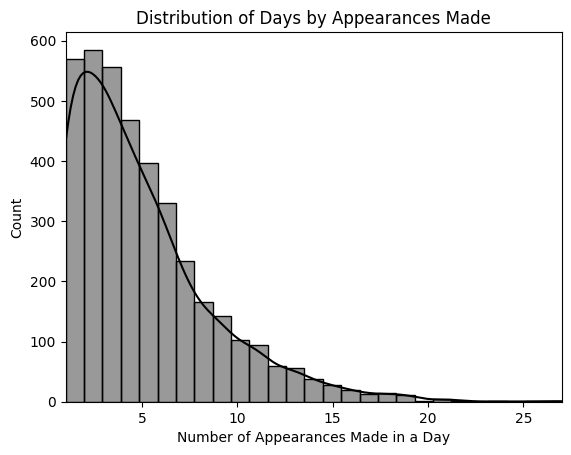

In [15]:
#getting appearances by day data
df = pd.read_csv("house_appearances_fundraising.csv")
df
app = df[df["appearance_count"] == 1]
app_day = app.groupby("date")['appearance_count'].count()
app_day
p1 = sns.histplot(app_day, bins = 27, color="black", alpha=.4, kde=True)
plt.title('Distribution of Days by Appearances Made')
plt.xlabel('Number of Appearances Made in a Day')
plt.ylabel('Count')
p1.set(xlim=(1, 27))
#p1.set(ylim=(0, 110))
plt.show()

## Figure 4

  party_x     cnn   msnbc     fox
0       D  6188.0  4927.0   702.0
1       R  3891.0   846.0  3699.0


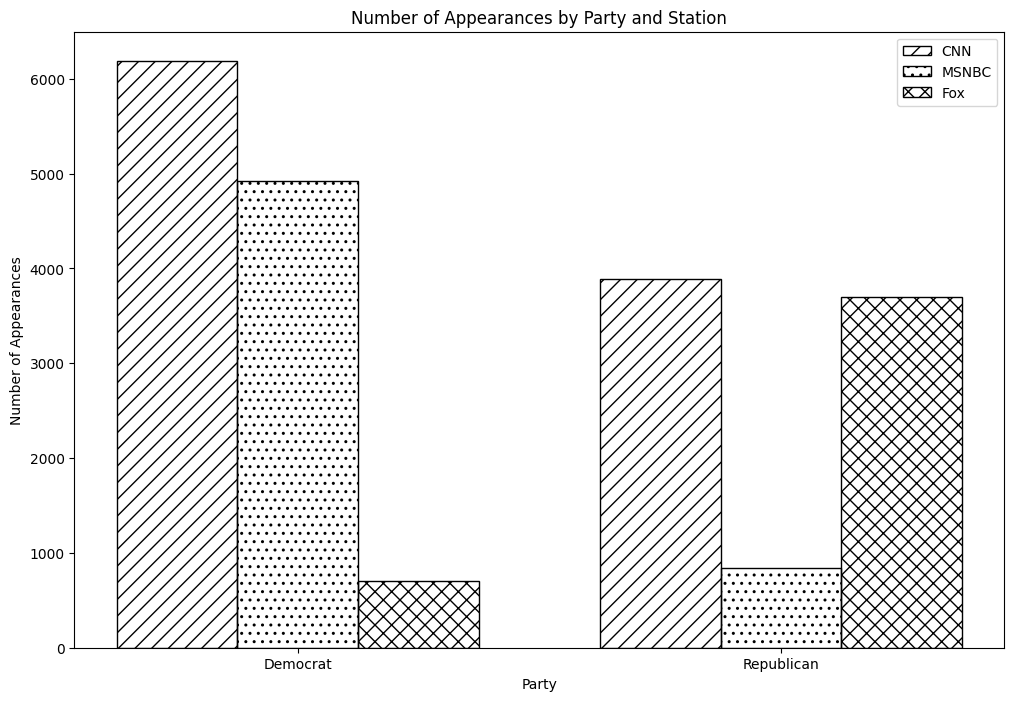

In [5]:
#Plotting appearances by party and network
df = pd.read_csv("house_appearances_fundraising.csv")
df1 = df.groupby(['party_x'])[['cnn','msnbc','fox']].sum().reset_index()
print(df1)
#df1.plot.bar(rot = 0)
#plt.show()


# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize=(12, 8))

# set height of bar
cnn = df1['cnn']
msnbc = df1['msnbc']
fox = df1['fox']

# Set position of bar on X axis
br = np.arange(len(gen_elect0))
br1 = br
br2 = [x + barWidth for x in br]
br3 = [x + barWidth * 2 for x in br]

# Make the plot
plt.bar(br1, cnn, fill=False, hatch = '//', width=barWidth, label='CNN')
plt.bar(br2, msnbc, fill=False, hatch = '..', width=barWidth, label='MSNBC')
plt.bar(br3, fox, fill=False, hatch = 'xx', width=barWidth, label='Fox')

# Adding Xticks
plt.ylabel('Number of Appearances')
plt.xlabel('Party')
plt.title('Number of Appearances by Party and Station')
plt.xticks([r + barWidth for r in range(len(gen_elect0))],
           ['Democrat','Republican'])

plt.legend()
plt.show()


## Figure A1-A4

C:\Users\Seth Benson\AppData\Local\Temp\ipykernel_31780\459323218.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\Seth Benson\AppData\Local\Temp\ipykernel_31780\459323218.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\Seth Benson\AppData\Local\Temp\ipykernel_31780\459323218.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\Seth Benson\AppData\Local\Temp\ipykernel_31780\459323218.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\Seth Benson\AppData\Local\Temp\ipykernel_31780\459323218.py:7: FutureWarning: T

count    4568.000000
mean        4.465630
std        14.877329
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       325.000000
Name: appearance_count1, dtype: float64


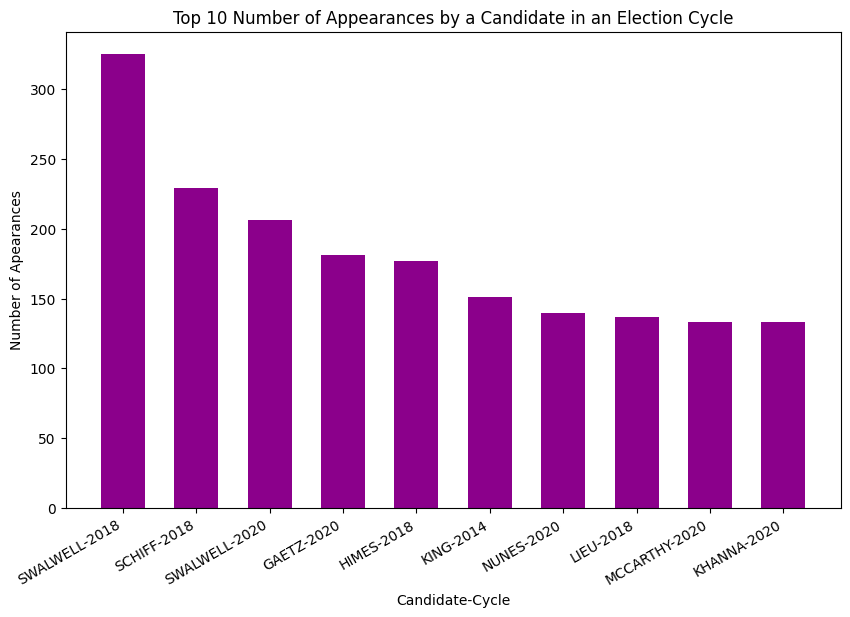

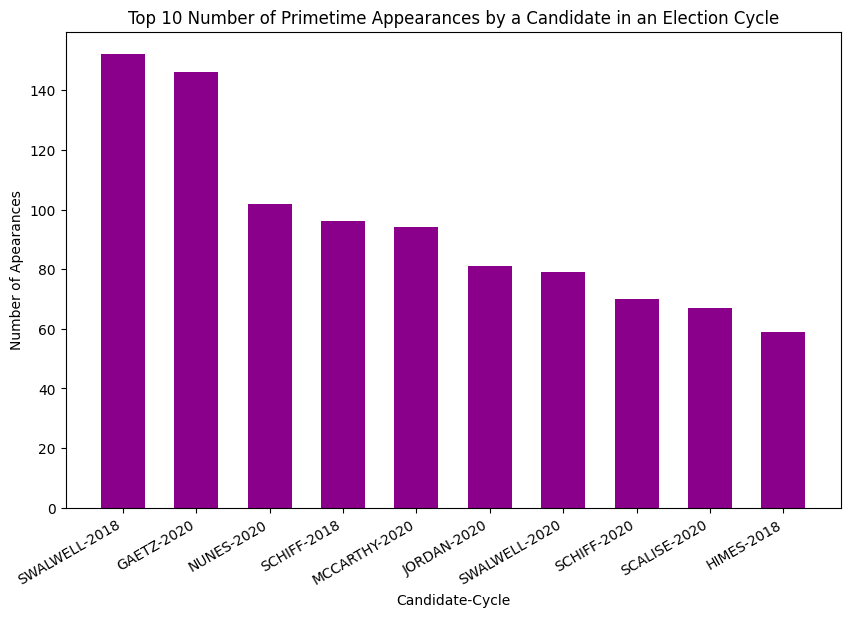

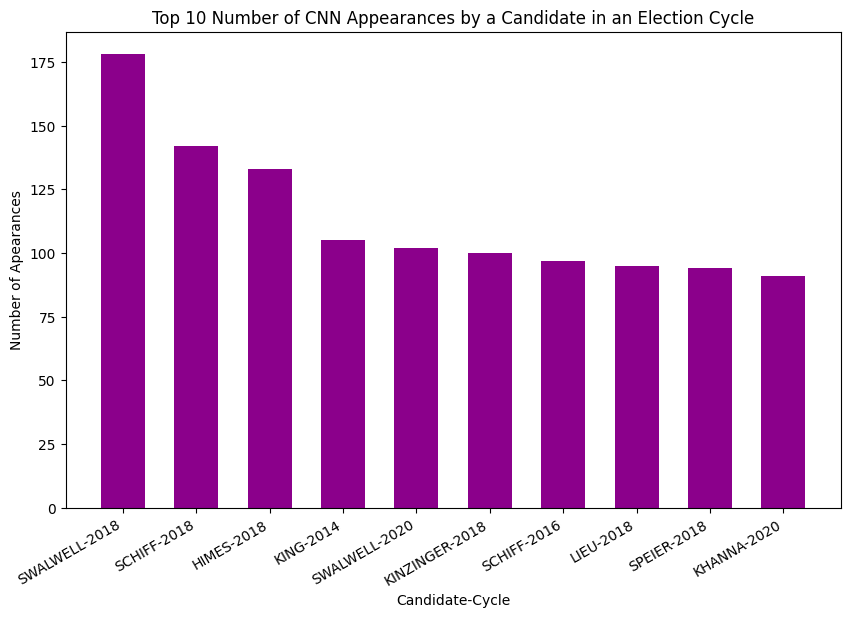

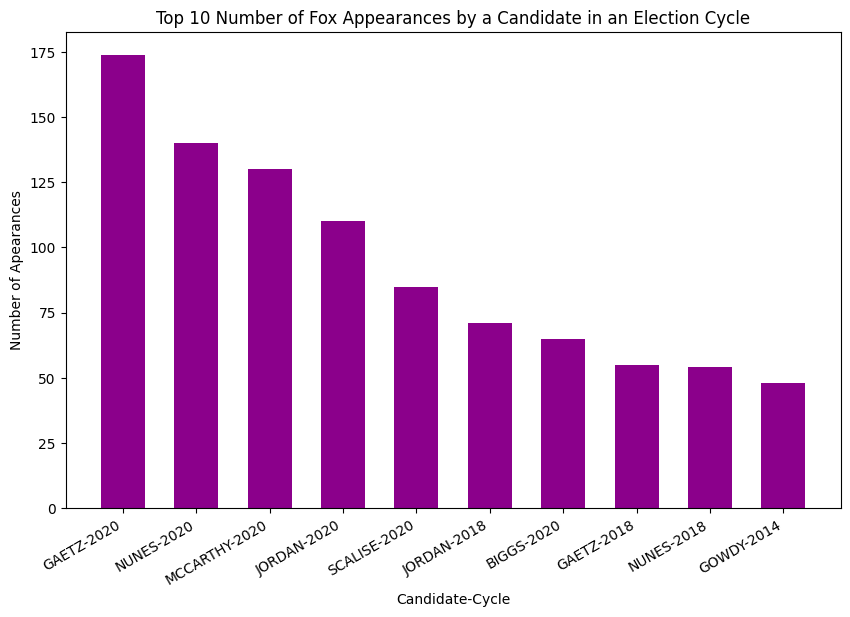

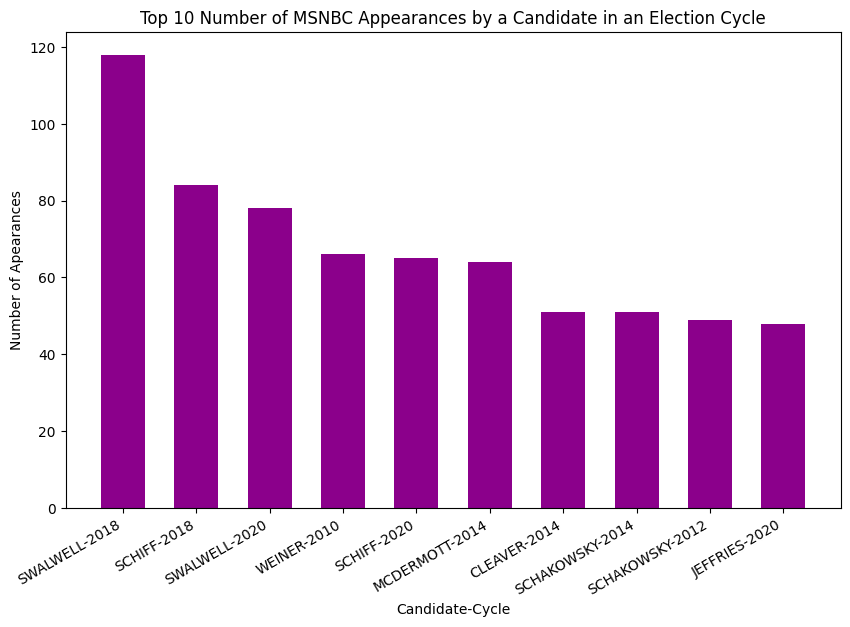

In [14]:
def top_appearances():
    cycles = [2020, 2018, 2016, 2014, 2012, 2010]
    df = pd.DataFrame()
    for cycle in cycles:
        data = pd.read_csv('Data/' + str(cycle) + '/candidateAppearanceCounts.csv')
        data['cycle'] = cycle
        df = df.append(data)
    #print(df)
    #print(df['appearance_count1'].max())
    print(df['appearance_count1'].describe())
    df_f = df.loc[df['appearance_count1'] > 10]
    df_f = df_f[['appearance_count1','primetime1','cnn','msnbc','fox','name_snyder','cycle']]
    names = df_f["name_snyder"].str.split(",", n=1, expand=True)
    df_f['Last_Name'] = names[0]
    df_f['Cand_Cycle'] = df_f['Last_Name'] + '-' + df_f['cycle'].astype(str)

    df_1 = df_f.sort_values('appearance_count1', ascending=False)[0:10]
    fig = plt.figure(figsize=(10, 7))
    plt.bar(df_1['Cand_Cycle'], df_1['appearance_count1'], color='darkmagenta',
            width=0.6)
    fig.autofmt_xdate()
    #plt.xticks(rotation=45)
    plt.title('Top 10 Number of Appearances by a Candidate in an Election Cycle')
    plt.xlabel('Candidate-Cycle')
    plt.ylabel('Number of Apearances')
    # p1.set(ylim=(0, 110))
    plt.show()
    #print(df_f)

    df_1 = df_f.sort_values('primetime1', ascending=False)[0:10]
    fig = plt.figure(figsize=(10, 7))
    plt.bar(df_1['Cand_Cycle'], df_1['primetime1'], color='darkmagenta',
            width=0.6)
    fig.autofmt_xdate()
    # plt.xticks(rotation=45)
    plt.title('Top 10 Number of Primetime Appearances by a Candidate in an Election Cycle')
    plt.xlabel('Candidate-Cycle')
    plt.ylabel('Number of Apearances')
    # p1.set(ylim=(0, 110))
    plt.show()
    #print(df_f)

    df_1 = df_f.sort_values('cnn', ascending=False)[0:10]
    fig = plt.figure(figsize=(10, 7))
    plt.bar(df_1['Cand_Cycle'], df_1['cnn'], color='darkmagenta',
            width=0.6)
    fig.autofmt_xdate()
    # plt.xticks(rotation=45)
    plt.title('Top 10 Number of CNN Appearances by a Candidate in an Election Cycle')
    plt.xlabel('Candidate-Cycle')
    plt.ylabel('Number of Apearances')
    # p1.set(ylim=(0, 110))
    plt.show()
    #print(df_f)

    df_1 = df_f.sort_values('fox', ascending=False)[0:10]
    fig = plt.figure(figsize=(10, 7))
    plt.bar(df_1['Cand_Cycle'], df_1['fox'], color='darkmagenta',
            width=0.6)
    fig.autofmt_xdate()
    # plt.xticks(rotation=45)
    plt.title('Top 10 Number of Fox Appearances by a Candidate in an Election Cycle')
    plt.xlabel('Candidate-Cycle')
    plt.ylabel('Number of Apearances')
    # p1.set(ylim=(0, 110))
    plt.show()
    #print(df_f)

    df_1 = df_f.sort_values('msnbc', ascending=False)[0:10]
    fig = plt.figure(figsize=(10, 7))
    plt.bar(df_1['Cand_Cycle'], df_1['msnbc'], color='darkmagenta',
            width=0.6)
    fig.autofmt_xdate()
    # plt.xticks(rotation=45)
    plt.title('Top 10 Number of MSNBC Appearances by a Candidate in an Election Cycle')
    plt.xlabel('Candidate-Cycle')
    plt.ylabel('Number of Apearances')
    # p1.set(ylim=(0, 110))
    plt.show()
    #print(df_f)


top_appearances()

## Figure A6 and A7

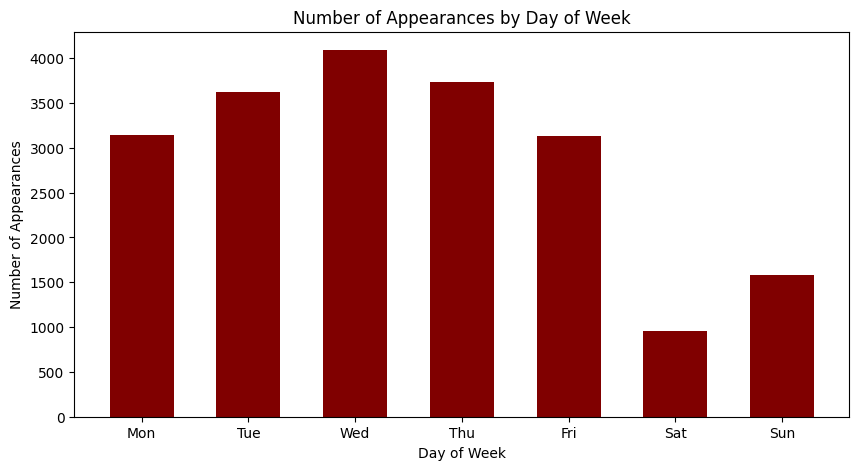

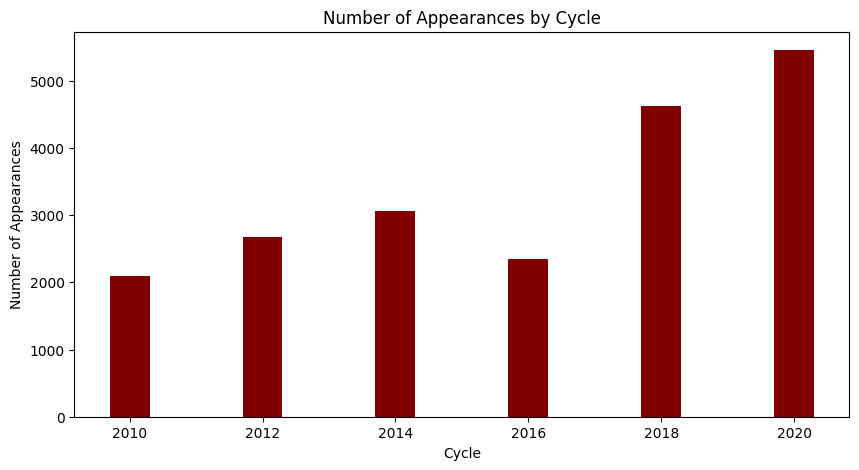

In [19]:
def appearance_timeline(df):
    df['date1'] = pd.to_datetime(df['date'])
    df['week_day'] = df['date1'].dt.dayofweek
    week_days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    df_week = df.groupby(['week_day'],as_index=False)['appearance_count1'].sum()
    fig = plt.figure(figsize=(10, 5))
    # creating the bar plot
    plt.bar(week_days, df_week['appearance_count1'], color='maroon',
            width=0.6)
    plt.ylabel("Number of Appearances")
    plt.xlabel("Day of Week")
    plt.title("Number of Appearances by Day of Week")
    plt.show()

    df_cycle = df.groupby(['year'], as_index=False)['appearance_count1'].sum()
    fig = plt.figure(figsize=(10, 5))
    # creating the bar plot
    plt.bar(df_cycle['year'], df_cycle['appearance_count1'], color='maroon',
            width=0.6)
    plt.ylabel("Number of Appearances")
    plt.xlabel("Cycle")
    plt.title("Number of Appearances by Cycle")
    plt.show()


#histPlot()

cycles = [2020, 2018, 2016, 2014, 2012, 2010]
df = pd.DataFrame()
"""for cycle in cycles:
    data = pd.read_csv('Data/' + str(cycle) + '/final_data.csv')
    df = df.append(data)
    print(cycle)"""
df = pd.read_csv("house_appearances_fundraising.csv")
#search_hist(df)
appearance_timeline(df)
